# Exploring relationships

### This script contains the following:

#### 1. Importing visualization libraries and data
#### 2. Identifying variables suitable for exploratory visual analysis 
#### 3. Exploring relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Define hypotheses
#### 5. Exporting data

### 1. Importing visualization libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version

matplotlib.__version__

'3.3.2'

^ This is the most recent version of matplotlib so we don't need to worry about updating it

In [3]:
# Create path

path = r'/Users/chadstacey/CF_Final_Project/Data'

In [4]:
# Import movies data

movies = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'movies_cleaned.pkl'))

In [5]:
movies.dtypes

budget             float64
company             object
country             object
director            object
genre               object
gross              float64
name                object
rating              object
released    datetime64[ns]
runtime              int64
score              float64
star                object
votes                int64
writer              object
year                object
dtype: object

### 2. Identifying variables suitable for exploratory visual analysis 

In [6]:
# Check output 

movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


The columns suitable for exploratory visual analysis are: 'budget', 'gross', 'runtime', 'score' and 'votes'. I am also going to derive a new column called 'profit' which will be the difference between 'gross' (total earnings of the movie) and 'budget' (total money spent on the production) and will give us an idea of the movie's actual success at the box office.

In [7]:
# Derive new column

movies['profit'] = movies['gross'] - movies['budget']

In [8]:
# Check output

movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0


With this new column, I now have 6 variables suitable for exploratory visual analysis.

### 3. Exploring relationships

### Correlations:

In [9]:
# Create a correlation matrix using pandas

movies.corr()

,budget,gross,runtime,score,votes,profit
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.107697
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.774599
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.076402
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.196692
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.484196
profit,0.107697,0.774599,0.076402,0.196692,0.484196,1.000000


In [10]:
# Create a subset excluding any columns with 'object' data type

sub_movies = movies[['budget', 'gross', 'runtime', 'score','votes', 'profit']]

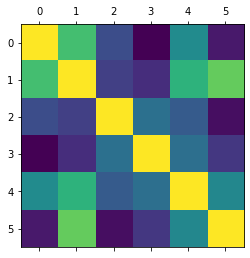

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_movies.corr())
plt.show()

Text(0.5, 1.0, 'Movies Correlation Matrix')

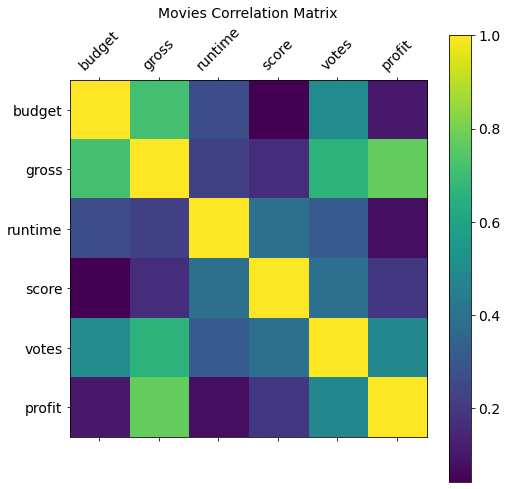

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize = (8, 8)) # figure size 
plt.matshow(sub_movies.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub_movies.shape[1]), sub_movies.columns, fontsize = 14, rotation = 45) # x axis labels
plt.yticks(range(sub_movies.shape[1]), sub_movies.columns, fontsize = 14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize = 14) # add font size
plt.title('Movies Correlation Matrix', fontsize=14) # add title

#### Now create a more user friendly heatmap using seaborn:

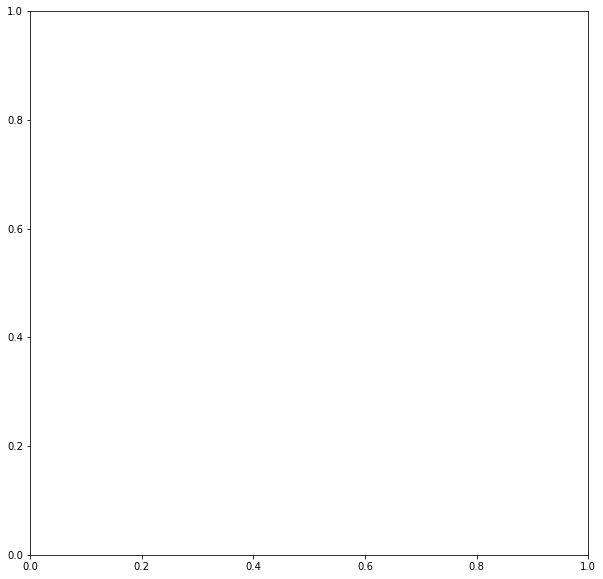

In [13]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

In [14]:
# Create the correlation heatmap in seaborn

corr = sns.heatmap(sub_movies.corr(), annot = True, ax = ax)

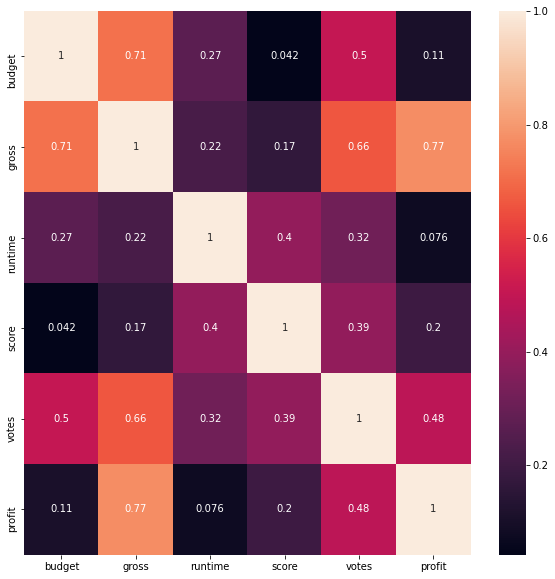

In [15]:
# Show heatmap

corr.figure

In [16]:
# Export this heatmap

corr.figure.savefig(os.path.join(path, 'Visualisations', 'correlation_heatmap.png'))

So, what do the coefficients in the plot mean in terms of the relationships between the variables?

The strongest positive correlation we can see is between 'gross' and 'profit'. This would make sense - generally the films with the highest revenues will have the highest profits, and the films with the lowest revenues will have the lowest profits. 

Similarly, 'budget' and 'gross' have a strong correlation - again, this makes sense. The more money that is invested in a movie, the more money you'd expect it to generate overall.

Interestingly, however, there isn't much correlation between 'budget' and actual 'profit', suggesting that many films in this data set performed worse at box office than would be expected based on their budget. 

Another pair of variables with a strong relationship are 'votes' and 'gross'. It can be inferred that the films with the highest revenues are the most widely known and thus entice more people to vote on IMDb.

Another interesting observation is that the legend only goes down to 0 and no further. This means that none of the variables have a negative relationship with one another. 

### Scatterplots:

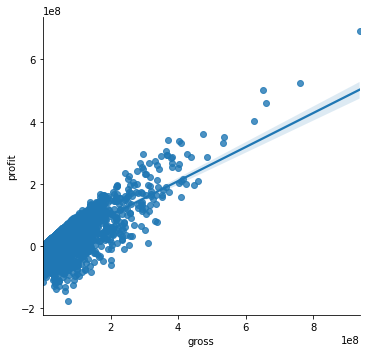

In [17]:
# Create a scatterplot for the "gross" and "profit" columns in seaborn

sns.lmplot(x = 'gross', y = 'profit', data = movies)

Here we can see the relationship between 'gross' and 'profit' can be described as a very strong positive correlation. There are no obvious outliers, the trend line is quiet steep and all the points are grouped pretty close to the line.

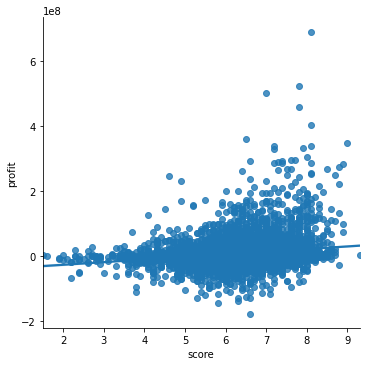

In [18]:
# Create a scatterplot for the "gross" and "profit" columns in seaborn

sns.lmplot(x = 'score', y = 'profit', data = movies)

Here we can see there's not much of a relationship between 'score' and 'profit'. There are a few outliers and the trend line is very shallow. We can deduce that lots of movies do very well at the box office and make plenty of money, but they're not actually scored that highly by viewers. 

### Pair plots:

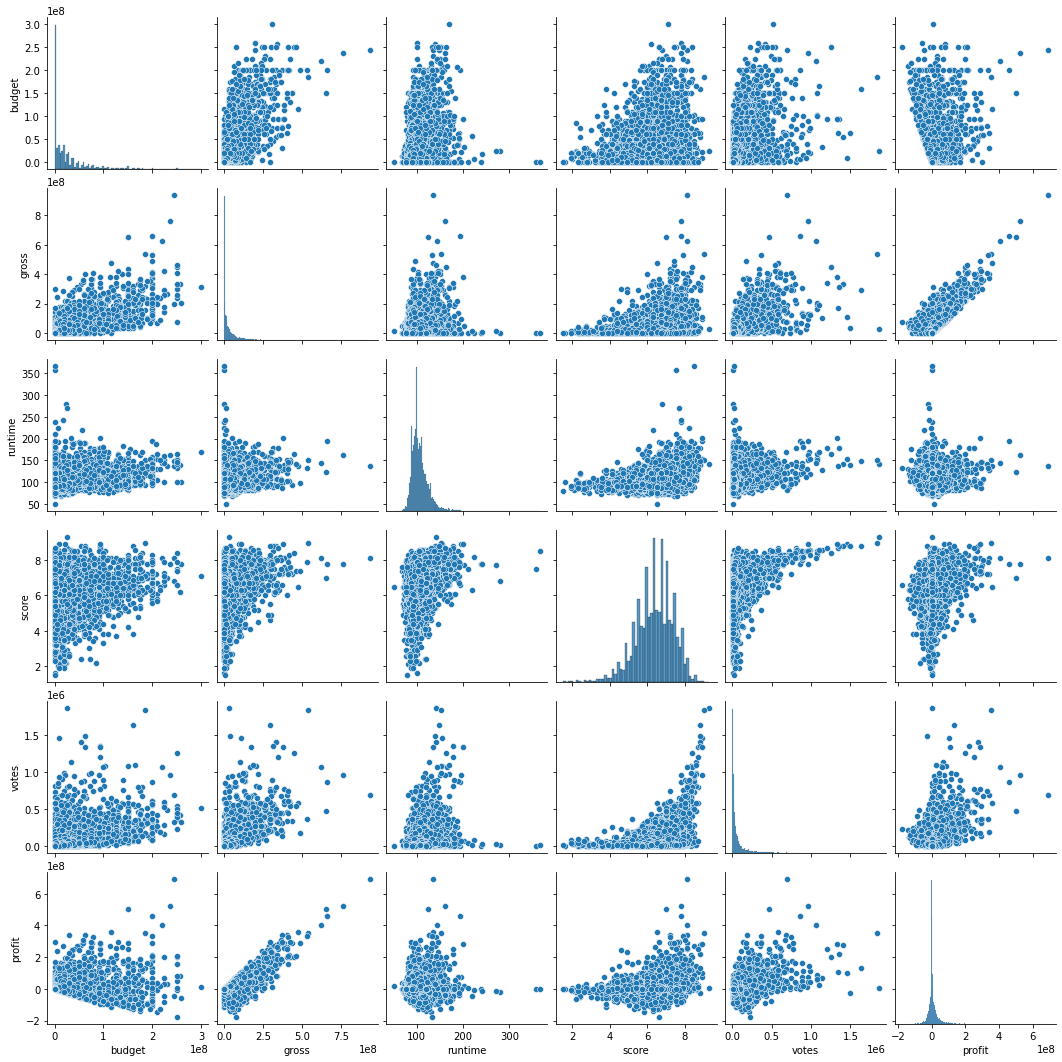

In [19]:
# Create a pair plot 

pair = sns.pairplot(sub_movies)

Out of the histograms, the only one showing a somewhat normal distribution is 'score'. All the other histograms are skewed to the left which is interesting, and this is a trend I'd like to explore further later in the analysis. 

The 'profit' histogram shows us that some films lost money at the box office, but most of them at least broke even and some at the top end have made upwards of $500,000,000 which is incredible.

The relationship between 'votes' and 'score' is interesting to look at. It suggests that the more people voted for a particular film, the higher that film was likely to score. This is intriguing - I would have thought that less popular films with a cult following would have less votes but higher scores, and more popular films would have a higher spread of user scores. The fact that the correlation coefficient between the two is only 0.4 shows that you can't attribute a huge amount of statistical significance here, but its an alluring trend nonetheless.

I'm also keen to investigate further the relationship between 'votes' and 'profit'. Why have more people voted on the commercially successful films? I suspect the answer is quite obvious but I'm still keen to dig deeper and really understand why people feel the need to enter into a debate which already has many voices (rather than trying to influence something more niche).

### Categorical Plots:

Creating a categorical variable that splits the 'score' column into categories:

<AxesSubplot:xlabel='score', ylabel='Count'>

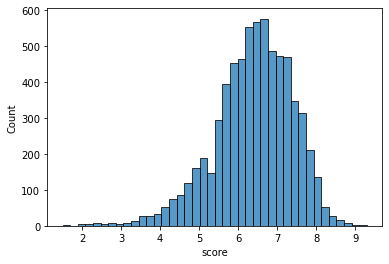

In [20]:
# Use a histogram to visualize the distribution of the variables

sns.histplot(sub_movies['score'], bins = 40)

In [21]:
# Use loc function to create new categorical function

movies.loc[movies['score'] < 6, 'score category'] = 'Low score'
movies.loc[(movies['score'] >= 6) & (movies['score'] < 8), 'score category'] = 'Middle score'
movies.loc[movies['score'] >= 8, 'score category'] = 'High score'

In [22]:
# Check output

movies.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,score category
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,4750497.0,Low score
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,28368.0,Low score
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,275000.0,Middle score
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,25981.0,Middle score
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,37757.0,Middle score


In [23]:
# Check count

movies['score category'].value_counts(dropna = False)

Middle score    4465
Low score       2115
High score       240
Name: score category, dtype: int64

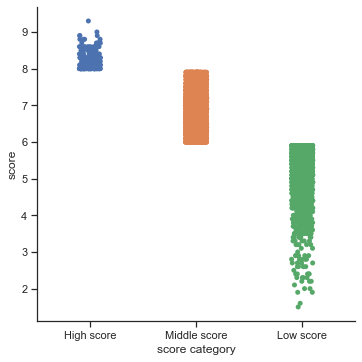

In [36]:
# And now create the categorical plot in seaborn

sns.set(style = 'ticks')
cp = sns.catplot(x = 'score category', y = 'score', data = movies)

One of my questions was 'Is there a positive correlation between profit and score?'

As we can see in the previous scatterplot and pair plot, there is a positive correlation but it is a very weak one.

I was also interested in whether movie length (runtime) has an effect on profit or score. We can see that runtime has almost 0 correlation with profit but it does have a slight positive correlation with score, indicating that longer movies generally score higher. 

### 4. Define hypotheses

I didn't include 'year' as a variable in any of my analyses here but I think that older films will generally score higher on IMDb. So one hypothesis could be 'If a film is made before 2005 then it will score higher than a film made after 2005.'

Another testable hypothesis could be 'If a film has a high revenue, it will garner more votes on IMDb.'

### 5. Exporting data

In [37]:
# Export to prepared data

movies.to_pickle(os.path.join(path, 'Prepared_Data', 'movies_cleaned_1.pkl'))